# DS 3000 - Assignment [7]

**Student Name**: [Yanzhen Chen]

**Date**: [10.15]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: Predicting Passenger Counts (50 pts)

San Francisco International Airport publishes data on monthly passenger traffic statistics for each airlineLinks to an external site. from 1999 to 2023. This dataset is used to understand air travel trends, particularly with international travelers, because tourism contributes significantly to the San Francisco economyLinks to an external site.. The purpose of this assignment is to understand the patterns and trends in the passenger traffic and create a statistical model to make predictions.



1. (3 pts) Load the data into a dataframe. Inspect the data and perform at least one type of data preparation.

In [32]:
import pandas as pd
df = pd.read_csv('/Users/chenyanzhen/Documents/DS3000/data/Air_Traffic_Passenger_Statistics.csv')
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM


In [34]:
# check the missing values
missing_values = df.isnull().sum()
print("Missing Value:\n", missing_values)

Missing Value:
 Activity Period                  0
Activity Period Start Date       0
Operating Airline                0
Operating Airline IATA Code    316
Published Airline                0
Published Airline IATA Code    316
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                  0
data_as_of                       0
data_loaded_at                   0
dtype: int64


2. (5 pts) Determine which terminal has the most passenger traffic and visualize the results. Explain the graph.

In [37]:
terminal_traffic = df.groupby('Terminal')['Passenger Count'].sum().reset_index()
print(terminal_traffic)

        Terminal  Passenger Count
0  International        245786292
1          Other              356
2     Terminal 1        228498252
3     Terminal 2         95333895
4     Terminal 3        415215075


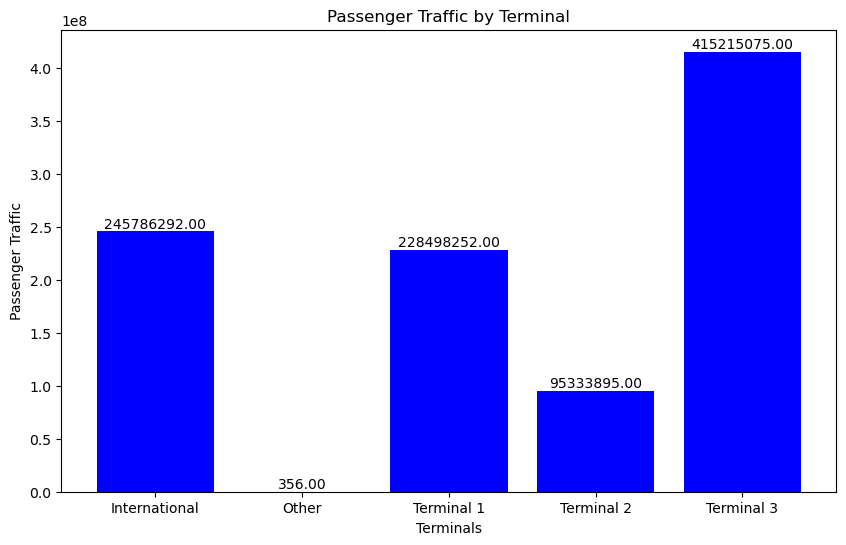

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bars = plt.bar(terminal_traffic['Terminal'], terminal_traffic['Passenger Count'], color='blue')
plt.title('Passenger Traffic by Terminal')
plt.xlabel('Terminals')
plt.ylabel('Passenger Traffic')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom') 

plt.show()


In the chart, we can see that terminal 3 has the highest number of passengers, which is twice as much as terminal 1 and international, while the “other terminal” has the lowest number of passengers, which is only 356.

3. (10 pts) Plot the annual domestic and international enplanement and deplanement using a line chart. Explain the patterns and discuss which years have the most and least passenger traffic.
Tip: It is recommended that you create two charts; chart #1 for the international travelers and Chart #2 for the domestic travelers. Then in each chart, visualize the number of passengers who enplaned and deplaned each year. The annual passenger enplanement and deplanement should be visualized using separate lines.

In [43]:
terminal_traffic_by_year = df.groupby('Activity Period Start Date')['Passenger Count'].sum().reset_index()
print(terminal_traffic_by_year)

    Activity Period Start Date  Passenger Count
0                   1999/07/01          3976746
1                   1999/08/01          3972694
2                   1999/09/01          3341964
3                   1999/10/01          3468846
4                   1999/11/01          3145240
..                         ...              ...
288                 2023/07/01          4960657
289                 2023/08/01          4727673
290                 2023/09/01          4325689
291                 2023/10/01          4443937
292                 2023/11/01          4115294

[293 rows x 2 columns]


In [45]:
df['Activity Period Start Date'] = pd.to_datetime(df['Activity Period Start Date'], format='%Y/%m/%d')
df['Year'] = df['Activity Period Start Date'].dt.year

domestic_traffic = df[df['GEO Summary'] == 'Domestic']
international_traffic = df[df['GEO Summary'] == 'International']

domestic_grouped = domestic_traffic.groupby(['Year', 'Activity Type Code'])['Passenger Count'].sum().unstack()
print(domestic_grouped)

international_grouped = international_traffic.groupby(['Year', 'Activity Type Code'])['Passenger Count'].sum().unstack()
print(international_grouped)

Activity Type Code  Deplaned  Enplaned  Thru / Transit
Year                                                  
1999                 8485199   8545107          150264
2000                16023322  16133466          312420
2001                13146120  13263633          255324
2002                11687601  11771589          240574
2003                11031391  11059743          168923
2004                12360938  12233814          183396
2005                12397367  12308968          200426
2006                12279323  12316447          150163
2007                13141924  13212505          128748
2008                14043824  14059207           98541
2009                14452958  14450146           76357
2010                15122300  15145876           89016
2011                15897565  15899323           75140
2012                17361130  17415286           60401
2013                17558721  17577273           65478
2014                18447104  18357357           40380
2015      

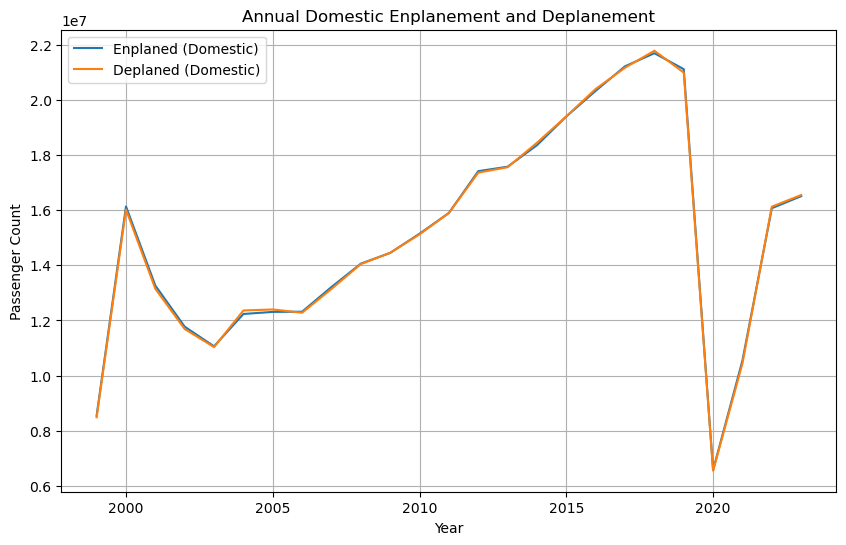

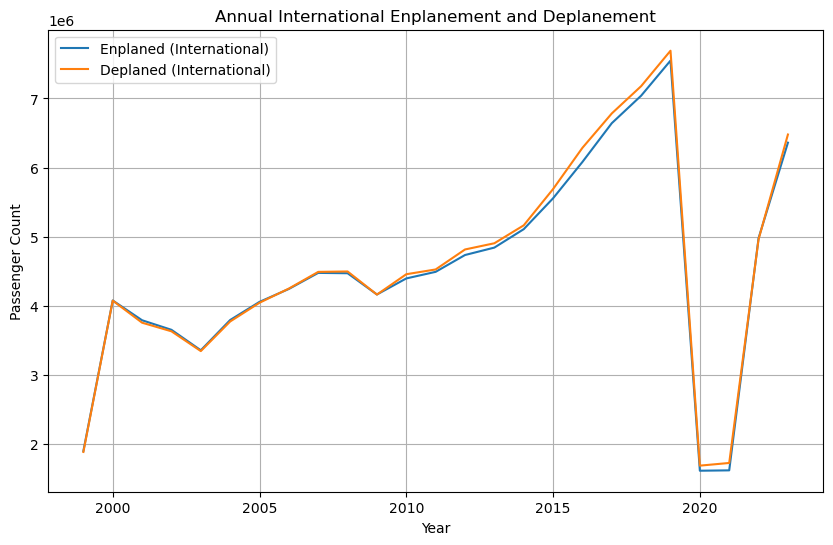

In [47]:
# line chart for annual domestic enplanement and deplanement 
plt.figure(figsize=(10,6))
plt.plot(domestic_grouped.index, domestic_grouped['Enplaned'], label='Enplaned (Domestic)')
plt.plot(domestic_grouped.index, domestic_grouped['Deplaned'], label='Deplaned (Domestic)')
plt.title('Annual Domestic Enplanement and Deplanement')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.show()

# line chart for annual international enplanement and deplanement 
plt.figure(figsize=(10,6))
plt.plot(international_grouped.index, international_grouped['Enplaned'], label='Enplaned (International)')
plt.plot(international_grouped.index, international_grouped['Deplaned'], label='Deplaned (International)')
plt.title('Annual International Enplanement and Deplanement')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.show()

In general, annual trends in the number of domestic and international enplaned and deplaned passengers are generally similar. Both saw a more pronounced decline in passenger numbers around 2000, but then grew steadily. Beginning in 2005, passenger numbers show a more steady growth trend until 2019 when passenger numbers peak. 2020 sees a sharp decline in the number of passengers boarding and deplaning both domestic and international travelers, down to almost the same level as in the early 2000s. This is clearly due to the severe impact of the COVID-19 epidemic on the airline industry. After 2021, as the impact of the epidemic wanes, passenger traffic begins to recover, but has not yet reached pre-epidemic levels.

4. (10 pts) Demonstrate which airlines contributed to the most passenger traffic over the last 10 years and visualize the results**? Are there changes in the top airlines each year? Ensure that you visualize the top 5 airlines and explain the patterns.

In [51]:
df['Published Airline'] = df['Published Airline'].replace({'United Airlines - Pre 07/01/2013': 'United Airlines'})
airline_traffic_cleaned = df.groupby(['Published Airline', 'Year'], as_index=False)['Passenger Count'].sum()

total_passenger_count_by_airline = airline_traffic_cleaned.groupby('Published Airline')['Passenger Count'].sum().reset_index()
top_5_airlines = total_passenger_count_by_airline.sort_values('Passenger Count', ascending=False).head(5)['Published Airline']

for airline in top_5_airlines:
    airline_data = airline_traffic_cleaned[airline_traffic_cleaned['Published Airline'] == airline]
    print(f"Airline: {airline}")
    print(airline_data)
    print("\n")

Airline: United Airlines
     Published Airline  Year  Passenger Count
988    United Airlines  1999         11573051
989    United Airlines  2000         21574331
990    United Airlines  2001         18602923
991    United Airlines  2002         16798888
992    United Airlines  2003         15656224
993    United Airlines  2004         17269576
994    United Airlines  2005         17210978
995    United Airlines  2006         17656683
996    United Airlines  2007         17963820
997    United Airlines  2008         16935276
998    United Airlines  2009         16464397
999    United Airlines  2010         17407102
1000   United Airlines  2011         18170200
1001   United Airlines  2012         20489846
1002   United Airlines  2013         20757298
1003   United Airlines  2014         21714658
1004   United Airlines  2015         22195144
1005   United Airlines  2016         23267699
1006   United Airlines  2017         24964467
1007   United Airlines  2018         25959227
1008   Un

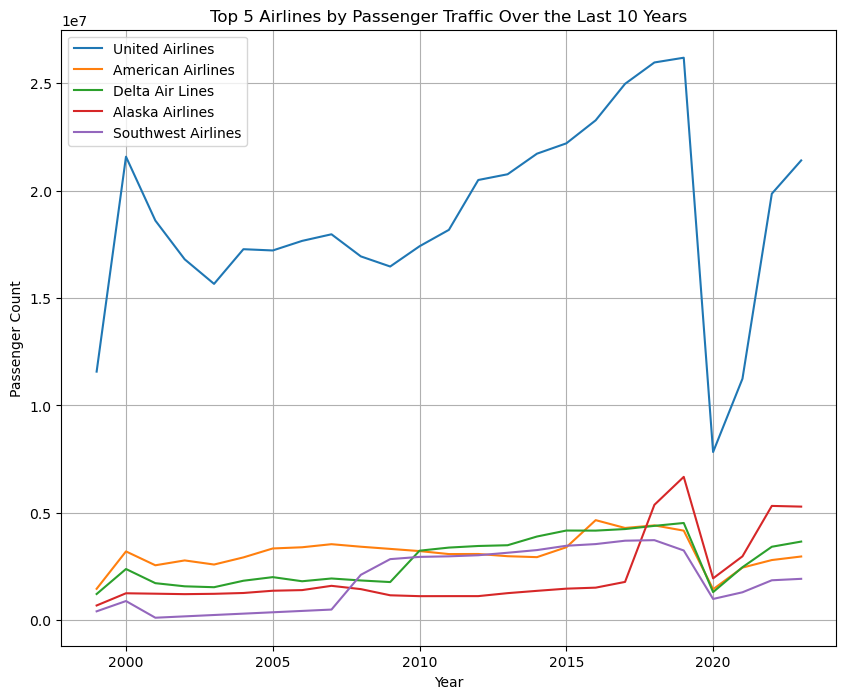

In [53]:
plt.figure(figsize=(10,8))
for airline in top_5_airlines:
    airline_data = airline_traffic_cleaned[airline_traffic_cleaned['Published Airline'] == airline]
    plt.plot(airline_data['Year'], airline_data['Passenger Count'], label=airline)

plt.title('Top 5 Airlines by Passenger Traffic Over the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.show()

United Airlines has been the largest airline in terms of passenger traffic over the past 10 years, growing consistently from 2013 to 2019, but recovering quickly after a sharp decline in 2020 due to the outbreak, approaching pre-epidemic levels in 2023.
Delta Air Lines , American Airlines, Alaska Airlines, and Southwest Airlines all experience significant declines in passenger numbers through 2020 and still do not reach pre-epidemic levels in 2023.
Alaska Airlines recovers faster and is almost back to pre-outbreak levels, while the other three airlines recover more slowly and still have lower passenger numbers in 2023 than in 2019.
Overall, all airlines were hit hard by the outbreak in 2020, but recovered at different rates


5. (7 pts) Extract data from 2003 to 2018 (inclusive), for all passengers who deplaned the aircraft in May e.g. May 2003, May 2004, May 2005 etc. Visualize the extracted data, using a line chart, and comment on the trend.

In [57]:
df['Activity Period Start Date'] = pd.to_datetime(df['Activity Period Start Date'])

#Filter the data from 2003 to 2018, and filter the data of passengers who Deplaned in May
may_deplaned_data = df[(df['Year'] >= 2003) & (df['Year'] <= 2018) & (df['Activity Period Start Date'].dt.month == 5)]
may_deplaned_data = may_deplaned_data[may_deplaned_data['Activity Type Code'] == 'Deplaned']


may_deplaned_grouped = may_deplaned_data.groupby('Year')['Passenger Count'].sum().reset_index()
for index, row in may_deplaned_grouped.iterrows():
    print(f"Year: {row['Year']}, Deplaned Passengers in May: {row['Passenger Count']}")

Year: 2003, Deplaned Passengers in May: 1105450
Year: 2004, Deplaned Passengers in May: 1366267
Year: 2005, Deplaned Passengers in May: 1420162
Year: 2006, Deplaned Passengers in May: 1402609
Year: 2007, Deplaned Passengers in May: 1511517
Year: 2008, Deplaned Passengers in May: 1636765
Year: 2009, Deplaned Passengers in May: 1575534
Year: 2010, Deplaned Passengers in May: 1682836
Year: 2011, Deplaned Passengers in May: 1766258
Year: 2012, Deplaned Passengers in May: 1900287
Year: 2013, Deplaned Passengers in May: 1942381
Year: 2014, Deplaned Passengers in May: 2064092
Year: 2015, Deplaned Passengers in May: 2186927
Year: 2016, Deplaned Passengers in May: 2296057
Year: 2017, Deplaned Passengers in May: 2355351
Year: 2018, Deplaned Passengers in May: 2510276


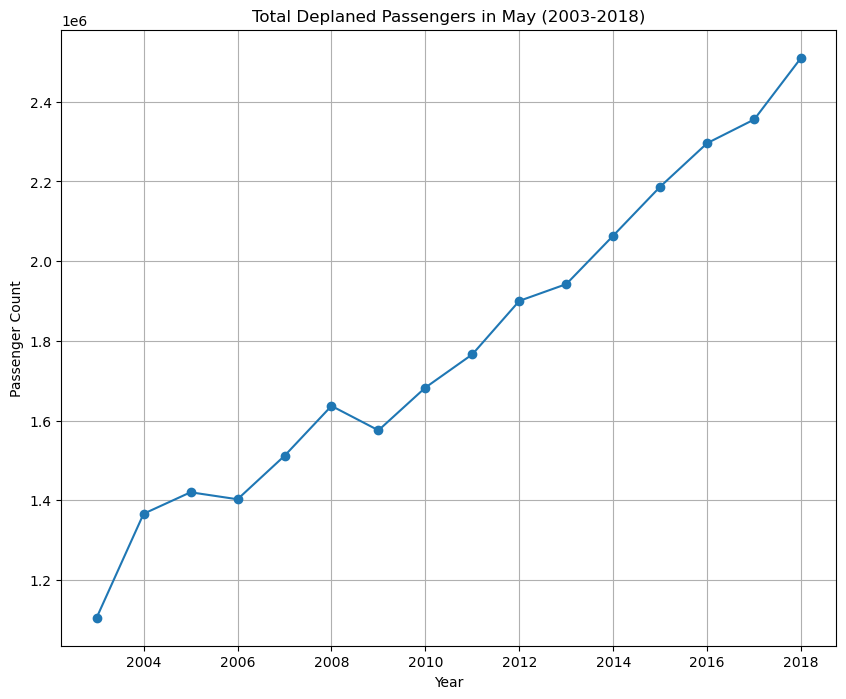

In [59]:
plt.figure(figsize=(10,8))
plt.plot(may_deplaned_grouped['Year'], may_deplaned_grouped['Passenger Count'], marker='o')
plt.title('Total Deplaned Passengers in May (2003-2018)')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()

The overall trend in the number of passengers disembarking each May from 2003-2018 has been steadily increasing. With the exception of some fluctuations between 2008 and 2010, when the number of passengers declined slightly, the overall trend remains upward.

6. (10 pts) Predict the passenger count for May 2019 and May 2020, using simple linear regression. Ensure that you visualize the original data and also include the predictions from the model. Compare the predicted passenger count with the actual passenger count. In your explanation, discuss how close/far your predictions are from the actual values.

In [63]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = may_deplaned_grouped['Year'].values.reshape(-1, 1) 
y = may_deplaned_grouped['Passenger Count'].values  
model = LinearRegression()
model.fit(X, y)

years_to_predict = np.array([[2019], [2020]])
predictions = model.predict(years_to_predict)
predicted_2019 = round(predictions[0],2)
predicted_2020 = round(predictions[1],2)

may_2019_data = df[(df['Year'] == 2019) & (df['Activity Period Start Date'].dt.month == 5) & (df['Activity Type Code'] == 'Deplaned')]
may_2020_data = df[(df['Year'] == 2020) & (df['Activity Period Start Date'].dt.month == 5) & (df['Activity Type Code'] == 'Deplaned')]
actual_2019 = round(may_2019_data['Passenger Count'].sum(),2)
actual_2020 = round(may_2020_data['Passenger Count'].sum(),2)

print(f"Predicted passenger count for May 2019: {predicted_2019}")
print(f"Actual passenger count for May 2019: {actual_2019}")
print(f"Predicted passenger count for May 2020: {predicted_2020}")
print(f"Actual passenger count for May 2020: {actual_2020}")


Predicted passenger count for May 2019: 2508647.75
Actual passenger count for May 2019: 2497897
Predicted passenger count for May 2020: 2592585.95
Actual passenger count for May 2020: 141790


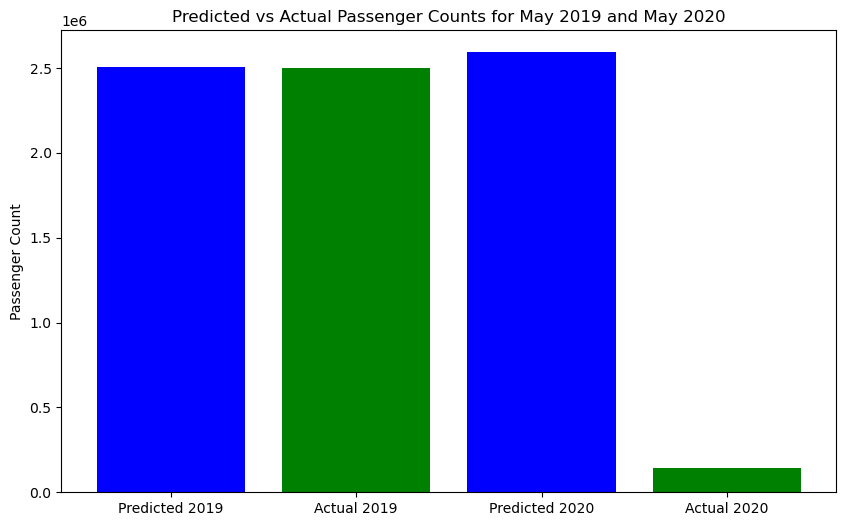

In [65]:
labels = ['Predicted 2019', 'Actual 2019', 'Predicted 2020', 'Actual 2020']
values = [predicted_2019, actual_2019, predicted_2020, actual_2020]
plt.figure(figsize=(10,6))
plt.bar(labels, values, color=['blue', 'green', 'blue', 'green'])
plt.title('Predicted vs Actual Passenger Counts for May 2019 and May 2020')
plt.ylabel('Passenger Count')
plt.show()

May 2019: The difference between the predicted and actual values is very small at about 10,750 riders with an error rate of about 0.43%. This indicates that the linear regression model is forecasting very well for 2019 and that the historical trends in the data are in good agreement with the actuals.
May 2020: the actual values for 2020 are much lower than the predicted values, with a variance of approximately 2,450,796 riders and a very high margin of error. This is due to the fact that the actual ridership dropped significantly in 2020 due to the severe impact of the COVID-19 outbreak, and the linear regression model failed to capture this unexpected event.

7. (5 pts) Calculate the R-squared and explain what this tells you about the model.

In [69]:
r_squared = model.score(X, y)
print(f"R-squared value = {round(r_squared,2)}")

R-squared value = 0.98


R-squared = 0.98 means that 98% of the variation in ridership can be explained by year.
This value is close to 1, indicating that the model fits the historical data very well and shows a strong linear relationship between year and ridership. The remaining 2% of the variation cannot be explained by year and may be influenced by other factors, such as events like COVID-19.

8. (5 pts)[optional/bonus] This is a challenge question that may require some research. Choose ONE of the following:

8.1 optional/challenge - residuals: Visualize the residuals of the regression model in question 6 and explain the chart.
Note: A residual is the difference between the actual and predicted values.



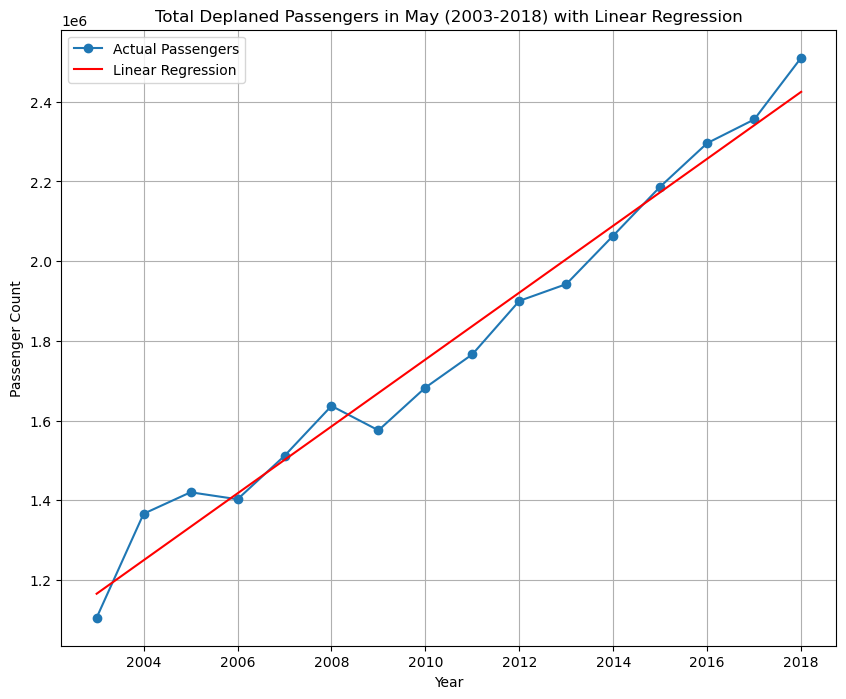

In [75]:
# Plot line charts and linear regression lines for the actual number of passengers
y_pred = model.predict(X)
plt.figure(figsize=(10,8))
plt.plot(may_deplaned_grouped['Year'], may_deplaned_grouped['Passenger Count'], marker='o', label='Actual Passengers')
plt.plot(may_deplaned_grouped['Year'], y_pred, color='red', label='Linear Regression')

plt.title('Total Deplaned Passengers in May (2003-2018) with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.legend()
plt.show()

Residuals:
 0     -60186.573529
1     116692.227941
2      86649.029412
3     -14842.169118
4      10127.632353
5      51437.433824
6     -93731.764706
7     -70367.963235
8     -70884.161765
9     -20793.360294
10    -62637.558824
11    -24864.757353
12     14032.044118
13     39223.845588
14     14579.647059
15     85566.448529
Name: Passenger Count, dtype: float64


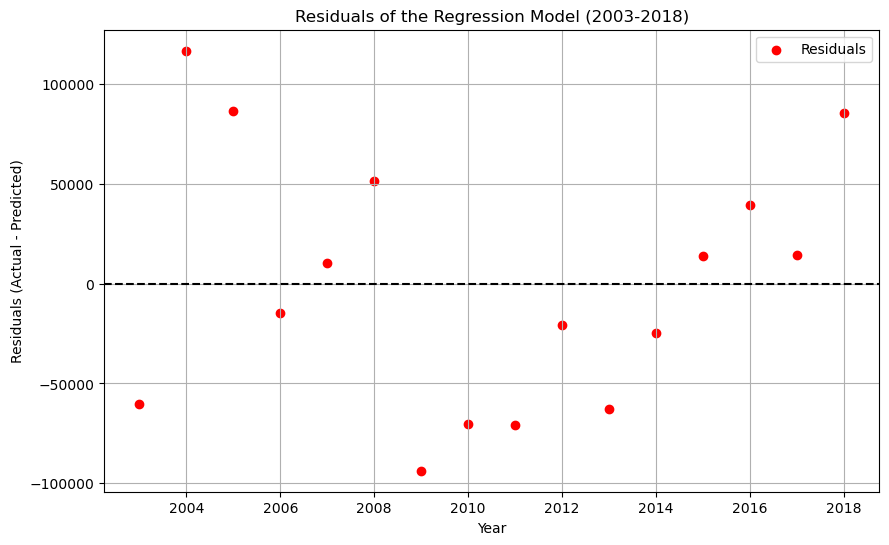

In [77]:
# Calculate residual: Actual value - predicted value
residuals = may_deplaned_grouped['Passenger Count'] - y_pred
print("Residuals:\n", residuals)

plt.figure(figsize=(10,6))
plt.scatter(may_deplaned_grouped['Year'], residuals, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')  # y=0 线
plt.title('Residuals of the Regression Model (2003-2018)')
plt.xlabel('Year')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.legend()
plt.show()


Overall, the distribution of positive and negative residuals is relatively even, and none of the errors are very large, suggesting that the 2003-2018 ridership data still fit the linear regression fit line relatively well